Model made by Yassine Ghouzam, PhD. Link to his kernel: https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6.
All credits go to him.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


Import data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Check values in train and test data 

In [3]:
print(train.isnull().sum().sum())

0


In [4]:
Y_train = train["label"]

In [5]:
X_train = train.drop('label',axis =1)

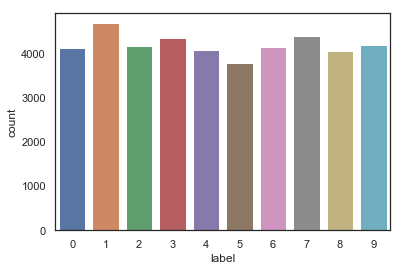

In [6]:
sns.countplot(Y_train)

In [7]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Normalization of brightness values of pixels

In [10]:
X_train = X_train /255.0
test = test / 255.0

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [12]:
Y_train = to_categorical(Y_train,num_classes = 10)

In [14]:
random_seed = 2

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state = random_seed)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


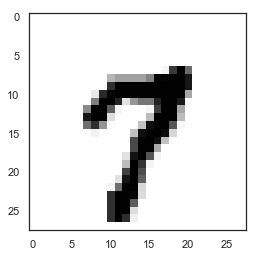

In [16]:
g = plt.imshow(X_train[100][:,:,0],cmap="Greys")
print(Y_train[100])

Model made by Yassine Ghouzam, PhD. Link to his kernel: https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6.
All credits go to him.

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))


In [52]:
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 1e-08, decay=0.0)

In [53]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0814 14:02:02.662978 10804 deprecation_wrapper.py:119] From C:\Users\Maciej\AppData\Roaming\Python\Python37\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 14:02:02.694227 10804 deprecation_wrapper.py:119] From C:\Users\Maciej\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [54]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [60]:
epochs = 36
batch_size = 86

In [57]:
datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False,
        samplewise_std_normalization = False,
        zca_whitening = False,
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        horizontal_flip = False,
        vertical_flip = False)

datagen.fit(X_train)

In [61]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size = batch_size), epochs = epochs, validation_data = (X_val, Y_val), verbose = 2, steps_per_epoch = X_train.shape[0]// batch_size, callbacks = [learning_rate_reduction])

Epoch 1/36
 - 200s - loss: 0.1479 - acc: 0.9561 - val_loss: 0.3037 - val_acc: 0.9807
Epoch 2/36
 - 208s - loss: 0.0993 - acc: 0.9711 - val_loss: 0.1941 - val_acc: 0.9879
Epoch 3/36
 - 207s - loss: 0.0805 - acc: 0.9761 - val_loss: 0.1650 - val_acc: 0.9898
Epoch 4/36
 - 207s - loss: 0.0700 - acc: 0.9796 - val_loss: 0.1151 - val_acc: 0.9929
Epoch 5/36
 - 207s - loss: 0.0679 - acc: 0.9804 - val_loss: 0.1765 - val_acc: 0.9890
Epoch 6/36
 - 207s - loss: 0.0635 - acc: 0.9813 - val_loss: 0.1155 - val_acc: 0.9926
Epoch 7/36
 - 206s - loss: 0.0577 - acc: 0.9833 - val_loss: 0.2533 - val_acc: 0.9843

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/36
 - 216s - loss: 0.0467 - acc: 0.9864 - val_loss: 0.1266 - val_acc: 0.9921
Epoch 9/36
 - 212s - loss: 0.0455 - acc: 0.9865 - val_loss: 0.1228 - val_acc: 0.9924
Epoch 10/36
 - 206s - loss: 0.0425 - acc: 0.9881 - val_loss: 0.1863 - val_acc: 0.9883

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.00025000

NameError: name 'history' is not defined

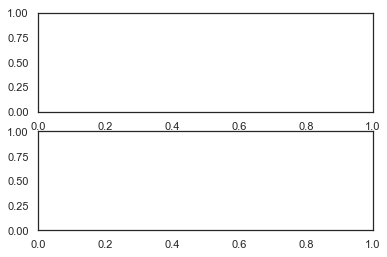

In [6]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color ='b', label = 'training loss')
ax[0].plot(history.history['val_loss'], color = 'r', label = 'validation loss', axes = ax[0])
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history.history['acc'], color ='b', label = 'training accuracy')
ax[1].plot(history.history['val_acc'], color = 'r', label = 'validation accuracy')
legend = ax[1].legend(loc = 'best', shadow = True)

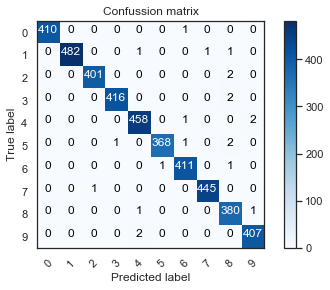

In [23]:
def plot_confussion_matrix(cm, classes, normalize = False, title = 'Confussion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    
    thresh = cm.max()/2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
Y_pred = model2.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confussion_matrix(confusion_mtx, classes = range(10))

Making predictions and creating kaggle submission file.

In [27]:
prediction = model2.predict(test)
prediction = np.argmax(prediction,axis=1)
prediction = pd.Series(prediction,name="Label")

In [29]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), prediction], axis = 1)
submission.to_csv("submission.csv", index = False)

# Part made by myself just for training

I created function that takes image from computer and tells what digit is on the picture. It is best when photos have good contrast and are close to being square.

In [66]:
from PIL import Image, ImageOps, ImageEnhance

Importing image and resizing it to same resoution as training pictures. Also inverts colors and make picture grayscale

In [21]:
im = Image.open('test_picture.jpg')

In [22]:
im_resized = im.resize((28,28),Image.ANTIALIAS)

In [23]:
im_resiz_invert = ImageOps.invert(im_resized)

In [24]:
im_done = ImageOps.grayscale(im_resiz_invert)

Some trying before creating function predicting what digit is on picture

In [70]:
pixels = list(im_done.getdata())
width, height = im_done.size
pixels = [pixels[i *width:(i+1)*width] for i in range(height)]

In [71]:
df = np.stack(pixels,axis=0)

In [25]:
im_done.save("testowa_cyfra_28.jpg")

In [26]:
pix = im_done.load()

In [27]:
lista = []
lista_pikseli = []

In [28]:
for i in range(784):
    lista.append("pixel"+str(i))

In [50]:
df = pd.DataFrame(columns= lista)

In [177]:
for i in range(28):
    for j in range(28):
        lista_pikseli.append(pix[i,j])

In [178]:
len(lista_pikseli)

784

In [179]:
df = df.append(pd.Series(lista_pikseli, index = lista),ignore_index=True)

In [180]:
df = df/255.0

In [76]:
df = df.reshape(-1,28,28,1)

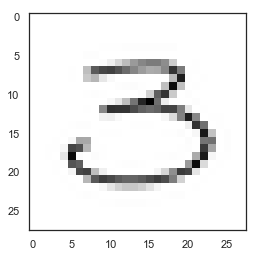

In [66]:
g = plt.imshow(pixels,cmap="Greys")

In [85]:
prediction = model2.predict(df)
#prediction = np.argmax(prediction,axis=1)
#prediction = pd.Series(prediction,name="Label")

In [86]:
prediction

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [84]:
def plot_zdjecie_pixels(zdjecie):
    pixels = list(zdjecie.getdata())
    width, height = zdjecie.size
    pixels = [pixels[i *width:(i+1)*width] for i in range(height)]
    g = plt.imshow(pixels,cmap="Greys")

# Function which takes a photo path and model which will be used to predict digit

In [363]:
def check_digit(photo, model):
    
    #preparing photo
    im = Image.open(photo)
    im = im.resize((28,28),Image.ANTIALIAS)
    im = ImageOps.grayscale(im)
    
    #getting pixels from photo
    pixels = list(im.getdata())

    #Brightness and contrust up. Inverting colors in the picture
    im = ImageEnhance.Brightness(im).enhance(1.3)
    im = ImageEnhance.Contrast(im).enhance(5.0)
    im = ImageOps.invert(im)
    
    pixels = list(im.getdata())
    
    width, height = im.size
    pixels = [pixels[i *width:(i+1)*width] for i in range(height)]
    
    #resizing df
    df = np.stack(pixels,axis=0) 
    df = df.reshape(-1,28,28,1)
    
    #making prediction
    prediction = model.predict(df)
    prediction = np.argmax(prediction,axis=1)
    
    #returning predicted digit
    return prediction

array([9], dtype=int64)

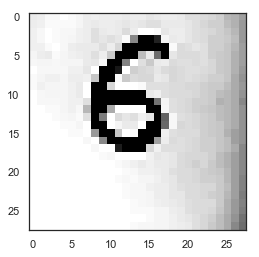

In [365]:
check_photo("test_image.jpg",model2)

Saving and loading model

In [ ]:
model.save('my_model.h5')

In [18]:
model2 = keras.models.load_model('my_model.h5')

W0816 14:38:58.034000  2036 deprecation_wrapper.py:119] From C:\Users\Maciej\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 14:38:58.377838  2036 deprecation_wrapper.py:119] From C:\Users\Maciej\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 14:38:58.518239  2036 deprecation_wrapper.py:119] From C:\Users\Maciej\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0816 14:38:58.565163  2036 deprecation_wrapper.py:119] From C:\Users\Maciej\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0

In [19]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

www.tensorflow.org/tutorials/keras/save_and_restore_models